## Vidushi

In [687]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score ,f1_score,r2_score,roc_curve,roc_auc_score,balanced_accuracy_score
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE

*Imbalanced Data* 

In [534]:
data = pd.read_csv('data/processedData.csv')

In [535]:
data.y.replace(to_replace = ['yes','no'], value = [1,0],inplace = True)

In [536]:
y=data['y']
X=data.drop(columns=['y'])

In [537]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=16)

Smote Data

In [538]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

# Decision Tree

Decision Tree using Imbalanced Data

In [539]:
tree = DecisionTreeClassifier()

In [540]:
model_tree = tree.fit(X_train,y_train)

In [541]:
y_pred_tree = model_tree.predict(X_test)

In [542]:
print(f"Accuracy: {round(metrics.balanced_accuracy_score(y_test, y_pred_tree)*100,2)}%")

Accuracy: 73.87%


In [543]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10934
           1       0.52      0.54      0.53      1423

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [544]:
print(confusion_matrix(y_test,y_pred_tree))

[[10207   727]
 [  649   774]]


*Decision Tree using SMOTE Data*

In [564]:
smote_model = tree.fit(X_SMOTE,y_SMOTE)

In [565]:
y_pred = smote_model.predict(X_test)

In [566]:
print(f"Accuracy: {round(metrics.balanced_accuracy_score(y_test,y_pred)*100,2)}%")

Accuracy: 72.46%


In [567]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10934
           1       0.48      0.52      0.50      1423

    accuracy                           0.88     12357
   macro avg       0.71      0.72      0.72     12357
weighted avg       0.88      0.88      0.88     12357



*Optimization*

In [568]:
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': [5,7,10,15,20],
              'min_samples_leaf': [5, 10,15,20],
              'max_leaf_nodes': [5, 10, 20]}
grid = GridSearchCV(smote_model, param_grid, cv=4, scoring = 'balanced_accuracy')
smote_best_param_tree = grid.fit(X_SMOTE,y_SMOTE)

In [569]:
smote_best_param_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 15}

In [570]:
smote_tree_tuned = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7,max_leaf_nodes = 20,min_samples_leaf = 15)

In [571]:
smote_model_tree_tuned = smote_tree_tuned.fit(X_SMOTE,y_SMOTE)

In [572]:
smote_y_pred_tree_tuned = smote_model_tree_tuned.predict(X_test)

In [577]:
print(f"Accuracy: {round(metrics.balanced_accuracy_score(y_test, smote_y_pred_tree_tuned)*100,2)}%")

Accuracy: 87.98%


In [578]:
print(classification_report(y_test,smote_y_pred_tree_tuned))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     10934
           1       0.41      0.94      0.57      1423

    accuracy                           0.83     12357
   macro avg       0.70      0.88      0.73     12357
weighted avg       0.92      0.83      0.86     12357



# ROC 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.933


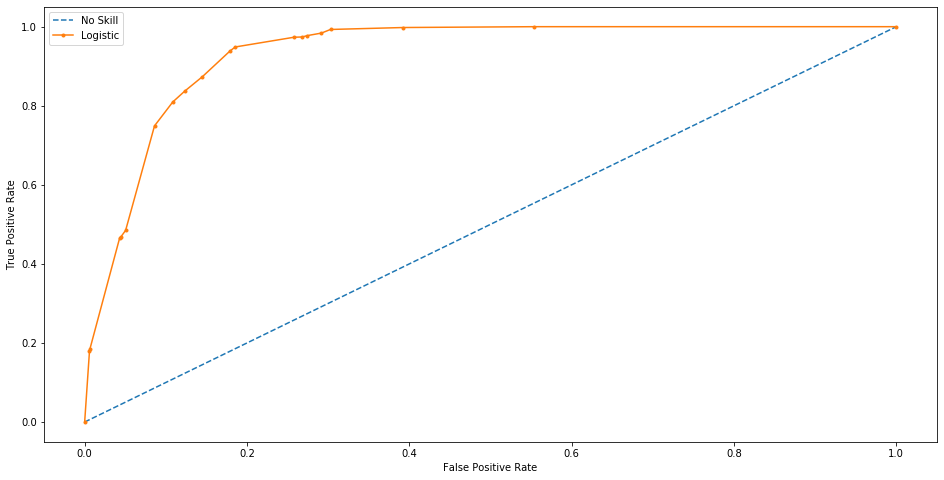

In [688]:
# generate a no skill prediction (majority class)
noskill_probs = [0 for _ in range(len(y_test))]

# predict probabilities
prob = smote_tree_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
prob = prob[:, 1]
# calculate scores
noskill_auc = roc_auc_score(y_test, noskill_probs)
auc = roc_auc_score(y_test, prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (noskill_auc))
print('Logistic: ROC AUC=%.3f' % (auc))
# calculate roc curves
noskill_fpr, noskill_tpr, _ = roc_curve(y_test, noskill_probs)
fpr, tpr, _ = roc_curve(y_test, prob)
# plot the roc curve for the model
plt.figure(figsize=(16,8))
plt.plot(noskill_fpr, noskill_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
plt.figure(figsize = (50,40))
tree.plot_tree(smote_tree_tuned,filled = True,feature_names=X.columns,class_names=['y = no','y = yes'])
plt.show()

# Random Forest

Random Forest using Imbalanced Data

In [579]:
forest = RandomForestClassifier()
model_rf = forest.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)

In [580]:
print(f"Accuracy: {round(metrics.balanced_accuracy_score(y_test, y_pred_rf)*100,2)}%")

Accuracy: 71.82%


In [581]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10934
           1       0.67      0.47      0.55      1423

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.90      0.91      0.91     12357



Random Forest using SMOTE Data

In [586]:
smote_model_rf = forest.fit(X_SMOTE,y_SMOTE)
smote_y_pred_rf = smote_model_rf.predict(X_test)

In [587]:
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test, smote_y_pred_rf)*100,2)}%")

Balanced Accuracy: 72.84%


In [588]:
print(classification_report(y_test,smote_y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10934
           1       0.61      0.50      0.55      1423

    accuracy                           0.91     12357
   macro avg       0.77      0.73      0.75     12357
weighted avg       0.90      0.91      0.90     12357



*Optimization*

In [679]:
criterion = ['gini','entropy']
n_estimators = [500,1000,1500]
max_depth = [1, 5, 8]
max_features = [3,4,5]
min_samples_split = [0.1,0.4,0.8]
min_samples_leaf = [1,3,5]
class_weight = ['none','balanced']


hyperF = dict( criterion = criterion,n_estimators = n_estimators, max_depth = max_depth,  
               max_features = max_features,class_weight=class_weight,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)

gridF = GridSearchCV(smote_model_rf, hyperF, cv = 4,n_jobs = -1,scoring = 'balanced_accuracy')
smote_best_param_rf = gridF.fit(X_SMOTE,y_SMOTE)

In [680]:
smote_best_param_rf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [698]:
smote_rf_tuned = RandomForestClassifier(criterion = 'entropy',n_estimators = 500, max_depth = 8,max_features = 5,min_samples_split = 0.1,min_samples_leaf=1, class_weight="balanced")

In [699]:
smote_model_rf_tuned = smote_rf_tuned.fit(X_SMOTE,y_SMOTE)

In [700]:
smote_y_pred_rf_tuned = smote_model_rf_tuned.predict(X_test)

In [701]:
print(f"Accuracy: {round(metrics.balanced_accuracy_score(y_test, smote_y_pred_rf_tuned)*100,2)}%")

Accuracy: 76.59%


In [702]:
print(classification_report(y_test,smote_y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     10934
           1       0.44      0.64      0.52      1423

    accuracy                           0.86     12357
   macro avg       0.69      0.77      0.72     12357
weighted avg       0.89      0.86      0.87     12357



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.905


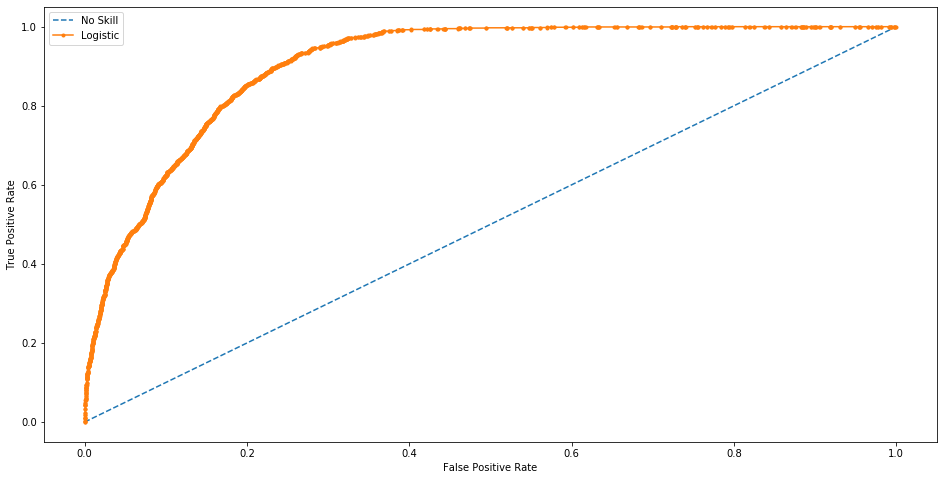

In [703]:
# generate a no skill prediction (majority class)
noskill_probs = [0 for _ in range(len(y_test))]

# predict probabilities
prob = smote_rf_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
prob = prob[:, 1]
# calculate scores
noskill_auc = roc_auc_score(y_test, noskill_probs)
auc = roc_auc_score(y_test, prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (noskill_auc))
print('Logistic: ROC AUC=%.3f' % (auc))
# calculate roc curves
noskill_fpr, noskill_tpr, _ = roc_curve(y_test, noskill_probs)
fpr, tpr, _ = roc_curve(y_test, prob)
# plot the roc curve for the model
plt.figure(figsize=(16,8))
plt.plot(noskill_fpr, noskill_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Gradient Boosting Machine

Gradient Boosting using imbalanced data

In [704]:
gb = GradientBoostingClassifier()
model_gb = gb.fit(X_train,y_train)
y_pred_gb = model_gb.predict(X_test)

In [705]:
print(f"Accuracy: {round(metrics.balanced_accuracy_score(y_test, y_pred_gb)*100,2)}%")

Accuracy: 75.26%


In [706]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10934
           1       0.67      0.54      0.60      1423

    accuracy                           0.92     12357
   macro avg       0.81      0.75      0.78     12357
weighted avg       0.91      0.92      0.91     12357



Gradient Boosting using SMOTE data

In [707]:
smote_model_gb = gb.fit(X_SMOTE,y_SMOTE)
smote_y_pred_gb = smote_model_gb.predict(X_test)

In [708]:
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test, smote_y_pred_gb)*100,2)}%")

Balanced Accuracy: 80.97%


In [709]:
print(classification_report(y_test,smote_y_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     10934
           1       0.56      0.69      0.62      1423

    accuracy                           0.90     12357
   macro avg       0.76      0.81      0.78     12357
weighted avg       0.91      0.90      0.91     12357



Optimization

In [ ]:
n_estimators = [500,1000,1500]
max_features = [3,4,5]
max_depth = [1,3,5,8]
learning_rate = [0.1,0.3,0.5]
min_samples_split = [0.1,0.4,0.8]
min_samples_leaf = [1,3,5]


hyper_gb = dict(n_estimators = n_estimators, max_depth = max_depth,  
               max_features = max_features,learning_rate = learning_rate,min_samples_leaf=min_samples_leaf,
               min_samples_split=min_samples_split)

grid_gb = GridSearchCV(smote_model_gb, hyper_gb, cv = 4,n_jobs = -1,scoring = 'balanced_accuracy')

smote_best_param_gb = grid_gb.fit(X_SMOTE,y_SMOTE)

In [ ]:
smote_best_param_gb.best_params_

In [661]:
smote_gb_tuned = GradientBoostingClassifier(n_estimators = 1000,max_features = 3,learning_rate = 0.3)

In [662]:
smote_model_gb_tuned = smote_gb_tuned.fit(X_SMOTE,y_SMOTE)

In [663]:
smote_y_pred_gb_tuned = smote_model_gb_tuned.predict(X_test)

In [664]:
print(f"Accuracy: {round(metrics.balanced_accuracy_score(y_test, smote_y_pred_gb_tuned)*100,2)}%")

Accuracy: 76.32%


In [644]:
print(classification_report(y_test,smote_y_pred_gb_tuned))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10934
           1       0.59      0.45      0.51      1423

    accuracy                           0.90     12357
   macro avg       0.76      0.71      0.73     12357
weighted avg       0.89      0.90      0.89     12357



In [ ]:
# generate a no skill prediction (majority class)
noskill_probs = [0 for _ in range(len(y_test))]

# predict probabilities
prob = smote_gb_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
prob = prob[:, 1]
# calculate scores
noskill_auc = roc_auc_score(y_test, noskill_probs)
auc = roc_auc_score(y_test, prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (noskill_auc))
print('Logistic: ROC AUC=%.3f' % (auc))
# calculate roc curves
noskill_fpr, noskill_tpr, _ = roc_curve(y_test, noskill_probs)
fpr, tpr, _ = roc_curve(y_test, prob)
# plot the roc curve for the model
plt.figure(figsize=(16,8))
plt.plot(noskill_fpr, noskill_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()